# CNN Modeling Experiments
## fine tuning gesture digital

QLQ Oct, 2020

This notebook will contain modeling, fit and validation. and by fine tuning based on Resnet50 model
work flowing
- Data import
- Split data
- Data generator
- Modeling
- Compile
- Fit
- Validation
- show training result chart
- prediction and show result

下面的例子参考  
https://pchun.work/resnet%e3%82%92fine-tuning%e3%81%97%e3%81%a6%e8%87%aa%e5%88%86%e3%81%8c%e7%94%a8%e6%84%8f%e3%81%97%e3%81%9f%e7%94%bb%e5%83%8f%e3%82%92%e5%ad%a6%e7%bf%92%e3%81%95%e3%81%9b%e3%82%8b/

In [66]:
import tensorflow
from PIL import Image
import numpy as np
import pylab
import pandas as pd
from keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers

### Import data

In [2]:
# Changing directory because all modules are in root directory
import os
pic_path = os.path.join('../../workspace', 'python')
if os.getcwd().split('/')[-1] == 'experiment':
    os.chdir(pic_path)
os.getcwd()

'/workspace/python'

In [68]:
# Global constants
base_dir = 'hand_sign_digit_data'
train_path = os.path.join(base_dir, "train")
validation_path = os.path.join(base_dir, "validation")
test_path = os.path.join(base_dir, "test")

model_name = 'CNN-fine-tuning-gesture-digital.h5'
model_path = os.path.join('../../workspace', 'model', model_name)
csv_name = 'CNN-fine-tuning-gesture-digital_result.csv'
csv_path = os.path.join('../../workspace', 'model', csv_name)

# categorical constants
# 这里定义的类的名字要和分类文件夹的名字一样，否则数据生成的时候无法找到文件
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
classes_num = len(classes)

# other constands
img_width = 100
img_height = 100

In [4]:
train_path,validation_path,test_path

('hand_sign_digit_data/train',
 'hand_sign_digit_data/validation',
 'hand_sign_digit_data/test')

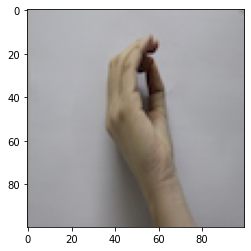

In [5]:
pic=Image.open(os.path.join(train_path,'0','0_2.jpg'))
pic_array=np.asarray(pic)
plt.imshow(pic_array)
plt.show()

In [6]:
pic_array.shape

(100, 100, 3)

### Data generator

In [17]:
# https://keras.io/ja/preprocessing/image/
train_datagenerator = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30.,
    width_shift_range=0.2,
    height_shift_range=0.2
)

validation_datagenerator = ImageDataGenerator(rescale=1.0 / 255)

In [18]:
train_data = train_datagenerator.flow_from_directory(train_path,
                                                     target_size=(img_width,
                                                                  img_height),
                                                     color_mode='rgb',
                                                     classes=classes,
                                                     class_mode='categorical',
                                                     batch_size=32,
                                                     shuffle=True)

validation_data = validation_datagenerator.flow_from_directory(
    validation_path,
    target_size=(img_width, img_height),
    color_mode='rgb',
    classes=classes,
    class_mode='categorical',
    batch_size=32,
    shuffle=True)

Found 1644 images belonging to 10 classes.
Found 418 images belonging to 10 classes.


### modeling

In [19]:
input_tensor = Input(shape=(img_width, img_height, 3))

In [20]:
base_model = ResNet50(weights='imagenet',
                      input_tensor=input_tensor,
                      input_shape=(img_width, img_height, 3),
                      include_top=False
                      #                       pooling='avg'
                      )

In [21]:
len(base_model.layers)

175

In [22]:
base_model.trainable = False

In [31]:
model = Sequential([
    base_model,
    #     Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    #     Dropout(0.5),
    Dense(classes_num, activation='softmax')
])

In [32]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
flatten_4 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               16777728  
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 40,370,570
Trainable params: 16,782,858
Non-trainable params: 23,587,712
_________________________________________________________________


### compile

In [33]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

### fit

In [52]:
# 如果不重启jupyter，重复执行fit的话，每次都会继续上一次的训练继续训练
history = model.fit_generator(
    train_data,
    #     steps_per_epoch=52,
    epochs=50,
    validation_data=validation_data
#     callbacks=[EarlyStopping()]
    #     validation_steps=14
)

Epoch 1/50
52/52 [==============================] - 6s 109ms/step - loss: 1.2786 - accuracy: 0.5395 - val_loss: 0.8851 - val_accuracy: 0.6627
Epoch 2/50
52/52 [==============================] - 6s 108ms/step - loss: 1.2946 - accuracy: 0.5322 - val_loss: 0.9859 - val_accuracy: 0.6531
Epoch 3/50
52/52 [==============================] - 6s 109ms/step - loss: 1.3774 - accuracy: 0.5024 - val_loss: 0.8449 - val_accuracy: 0.7201
Epoch 4/50
52/52 [==============================] - 6s 109ms/step - loss: 1.2866 - accuracy: 0.5596 - val_loss: 0.9170 - val_accuracy: 0.6818
Epoch 5/50
52/52 [==============================] - 6s 109ms/step - loss: 1.3140 - accuracy: 0.5262 - val_loss: 0.9442 - val_accuracy: 0.6531
Epoch 6/50
52/52 [==============================] - 6s 109ms/step - loss: 1.3430 - accuracy: 0.5134 - val_loss: 0.9663 - val_accuracy: 0.6220
Epoch 7/50
52/52 [==============================] - 6s 109ms/step - loss: 1.3460 - accuracy: 0.5298 - val_loss: 0.8448 - val_accuracy: 0.7177
Epoch 

### Training result chart show with plt

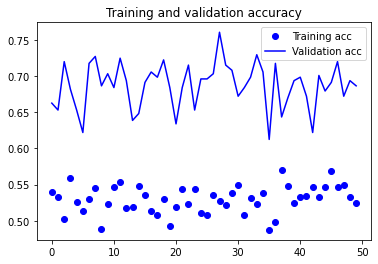

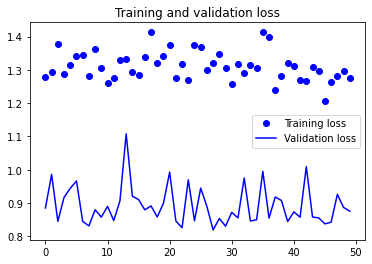

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Save model

In [59]:
model_path='../../workspace/model/CNN-fine-tuning-gesture-digital_200.h5'
model_path

'../../workspace/model/CNN-fine-tuning-gesture-digital_200.h5'

In [60]:
model.save(model_path)

### Read save

In [54]:
path=os.path.join('../../workspace/model/','sign_language_vgg16_1.h5')

In [55]:
model=tensorflow.keras.models.load_model(path)

In [37]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
flatten_4 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               16777728  
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 40,370,570
Trainable params: 16,782,858
Non-trainable params: 23,587,712
_________________________________________________________________


### prediction data

(640, 480, 3)


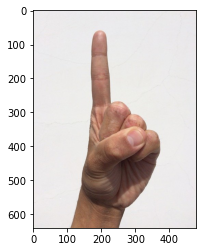

In [38]:
test_pic=Image.open(os.path.join(test_path,'1.jpg'))
test_pic_array=np.asarray(test_pic)
plt.imshow(test_pic_array)
print(test_pic_array.shape)
plt.show()

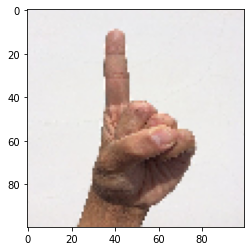

In [39]:
# 导入图片的时候就进行图片尺寸更改，效果显示，基本没有失真，但是图片尺寸改变了
file = 'hand_sign_digit_data/test/1.jpg'
pre_pic = image.load_img(file, target_size=(img_width, img_height))
pre_pic_array = image.img_to_array(pre_pic)
pylab.imshow(pre_pic)
pylab.show()

In [54]:
def pre_processing(file):
    pre_pic = image.load_img(file, target_size=(img_width, img_height))
    pre_pic_array = image.img_to_array(pre_pic)
    pre_pic_array = np.expand_dims(pre_pic_array, 0) / 255.0
    print(pre_pic_array.shape, pre_pic_array.dtype)
    return pre_pic_array

In [121]:
#os.walk方法获取当前路径下的root（所有路径）、dirs（所有子文件夹）、files（所有文件）
files_name_list = []


def get_files_name(pic_path):
    for root, dirs, files in os.walk(pic_path):
        for file in files:
            #print file.decode('gbk')    #文件名中有中文字符时转码
            if os.path.splitext(file)[1] == '.jpg':
                #                 print(os.path.join(root, file))
                files_name_list.append(os.path.join(root, file))
    return files_name_list

In [122]:
pd_res=pd.DataFrame()
path = os.path.join(test_path)
for file in get_files_name(path):
    print(file)
    result = model.predict(pre_processing(file))[0]
    print(result)
    print("prediction result TOP 5:")
    #     先降序排列然后取前5个值
    res = result.argsort()[::-1][:5]
    res_ = [(classes[i], result[i]) for i in res]
    pd_res_new=pd.DataFrame(res_,columns=['Digital_Result','Score'])
    step=np.array(['200']*5)
    file_name=file.split('/')[-1]
    file_name=np.array([file_name]*5)
    step=pd.DataFrame(step,columns=['step'])
    file_name=pd.DataFrame(file_name,columns=['file_name'])
    pd_res_new=pd.concat([pd_res_new,step,file_name],axis=1)
    pd_res=pd.concat([pd_res,pd_res_new],axis=1)
    for value in res_:
        print(value)

hand_sign_digit_data/test/1.jpg
(1, 100, 100, 3) float32
[0.188323   0.34024978 0.05150834 0.00527518 0.00236665 0.00071452
 0.10310359 0.06062175 0.18137102 0.06646616]
prediction result TOP 5:
('1', 0.34024978)
('0', 0.188323)
('8', 0.18137102)
('6', 0.103103586)
('9', 0.06646616)
hand_sign_digit_data/test/3.jpg
(1, 100, 100, 3) float32
[1.2172998e-06 3.5232661e-04 1.5323188e-03 1.6548473e-04 8.6748454e-04
 1.0119281e-02 9.6429980e-01 1.0043736e-02 1.0385243e-02 2.2330408e-03]
prediction result TOP 5:
('6', 0.9642998)
('8', 0.010385243)
('5', 0.010119281)
('7', 0.010043736)
('9', 0.0022330408)
hand_sign_digit_data/test/4.jpg
(1, 100, 100, 3) float32
[7.8315382e-10 2.6284082e-08 1.7513743e-05 3.2487542e-03 6.1973059e-01
 2.2063021e-01 6.2062102e-03 3.6286049e-02 2.2223800e-02 9.1656782e-02]
prediction result TOP 5:
('4', 0.6197306)
('5', 0.22063021)
('9', 0.09165678)
('7', 0.03628605)
('8', 0.0222238)
hand_sign_digit_data/test/4_1.jpg
(1, 100, 100, 3) float32
[4.67362071e-07 8.9583241

In [123]:
pd_res

,Digital_Result,Score,step,file_name,Digital_Result,Score,step,file_name,Digital_Result,Score,...,step,file_name,Digital_Result,Score,step,file_name,Digital_Result,Score,step,file_name
0,1,0.340250,50,1.jpg,6,0.964300,50,3.jpg,4,0.619731,...,50,4_186.jpg,3,0.381094,50,9_179.jpg,8,0.367078,50,9_181.jpg
1,0,0.188323,50,1.jpg,8,0.010385,50,3.jpg,5,0.220630,...,50,4_186.jpg,2,0.159153,50,9_179.jpg,0,0.339635,50,9_181.jpg
2,8,0.181371,50,1.jpg,5,0.010119,50,3.jpg,9,0.091657,...,50,4_186.jpg,7,0.147770,50,9_179.jpg,9,0.247216,50,9_181.jpg
3,6,0.103104,50,1.jpg,7,0.010044,50,3.jpg,7,0.036286,...,50,4_186.jpg,4,0.133681,50,9_179.jpg,7,0.028325,50,9_181.jpg
4,9,0.066466,50,1.jpg,9,0.002233,50,3.jpg,8,0.022224,...,50,4_186.jpg,8,0.053896,50,9_179.jpg,1,0.010226,50,9_181.jpg


In [124]:
pd_res.to_csv(csv_path)